### Clustering Analysis
Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters
using the elbow method.

Dataset Link: https://www.kaggle.com/datasets/uciml/iris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data = pd.read_csv("Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Select the features you want to use for clustering. 
# use the sepal length, sepal width, petal length, and petal width as the features for clustering.

# We will drop the 'Id' and 'Species' columns as they are not needed for clustering
iris_data_clustering = data.drop(['Id', 'Species'], axis=1)

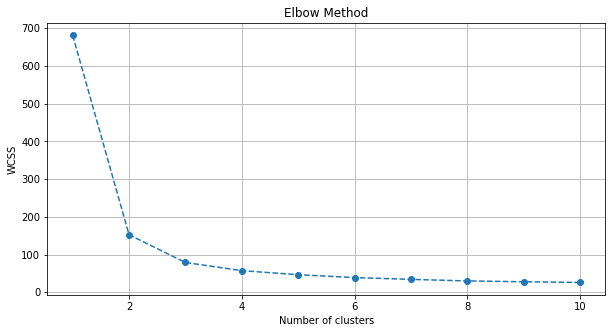

In [6]:
# Implementing the elbow method to find the optimal number of clusters

wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_data_clustering)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.grid()
plt.show()

In [9]:
# Let's say the elbow point indicates the optimal number of clusters is 'k'
k = 3  # Replace with your selected number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(iris_data_clustering)

# Adding the cluster labels to the original dataframe for interpretation
data['Cluster'] = y_kmeans

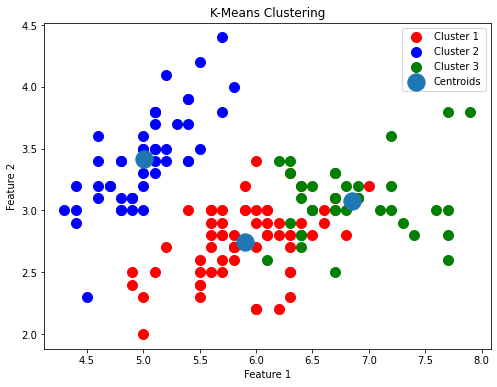

In [12]:
# Create a scatter plot of the clusters
X = iris_data_clustering
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Plot the cluster centers (centroids)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()